In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv("SalesKaggle3.csv")

df = df[df["PriceReg"] > 0]
df["stockvalue"] = df["ItemCount"] * df["LowUserPrice"]

df["MOC"] = df.ItemCount.sum() / (df.SoldCount.sum()/6)

df["stockage"] = 2024 - df["ReleaseYear"]

df['discount'] = np.round((df['PriceReg'] - df['LowNetPrice']) / df['PriceReg'])

df.loc[df['discount'] < 0, 'discount'] = 0

df = df[df["File_Type"] == "Historical"]

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])

df.head()

df = df[df.SoldFlag.notnull()]
df.info()

X = df.drop(columns=["SoldFlag","SoldCount","Order","SKU_number","File_Type","ReleaseYear"])
y = df["SoldFlag"]

from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74601 entries, 0 to 75995
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order             74601 non-null  int64  
 1   File_Type         74601 non-null  int32  
 2   SKU_number        74601 non-null  int64  
 3   SoldFlag          74601 non-null  float64
 4   SoldCount         74601 non-null  float64
 5   MarketingType     74601 non-null  int32  
 6   ReleaseNumber     74601 non-null  int64  
 7   New_Release_Flag  74601 non-null  int64  
 8   StrengthFactor    74601 non-null  float64
 9   PriceReg          74601 non-null  float64
 10  ReleaseYear       74601 non-null  int64  
 11  ItemCount         74601 non-null  int64  
 12  LowUserPrice      74601 non-null  float64
 13  LowNetPrice       74601 non-null  float64
 14  stockvalue        74601 non-null  float64
 15  MOC               74601 non-null  float64
 16  stockage          74601 non-null  int64 

In [7]:
X_train.shape, X_test.shape

((86573, 12), (37103, 12))

In [8]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (예: 맑은 고딕)
plt.rc('font', family='Malgun Gothic')  # Windows 사용자

# 한글 깨짐 방지를 위한 마이너 문제 해결
plt.rcParams['axes.unicode_minus'] = False

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

# 데이터 생성 (10만개)
# X, y = make_classification(n_samples=100000, n_features=20, n_classes=2, random_state=42)

# 데이터의 20%만 사용 (2만개)
# X, _, y, _ = train_test_split(X, y, train_size=0.3, random_state=42)

# 학습 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델과 하이퍼파라미터 설정
models = {
    "Logistic Regression": {
        "model": LogisticRegression,
        "params": {"C": np.logspace(-3, 3, 10)}
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier,
        "params": {"max_depth": range(1, 21)}
    },
    "Random Forest": {
        "model": RandomForestClassifier,
        "params": {"n_estimators": range(10, 210, 20)}
    },
    "XGBoost": {
        "model": XGBClassifier,
        "params": {"n_estimators": range(10, 210, 20)}
    },
    "KNN": {
        "model": KNeighborsClassifier,
        "params": {"n_neighbors": range(1, 21)}
    }
}

results = {}

for model_name, model_info in models.items():
    times = []
    accuracies = []
    param_name = list(model_info["params"].keys())[0]
    param_values = model_info["params"][param_name]
    
    for param_value in param_values:
        model = model_info["model"](**{param_name: param_value})
        
        start_time = time.time()
        model.fit(X_train, y_train)
        end_time = time.time()
        
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        times.append(end_time - start_time)
        accuracies.append(accuracy)
    
    results[model_name] = {"times": times, "accuracies": accuracies}

# 그래프 그리기
plt.figure(figsize=(12, 8))

for model_name, model_results in results.items():
    plt.plot(model_results["times"], model_results["accuracies"], label=model_name, marker='o')

plt.xlabel("학습 시간 (초)")
plt.ylabel("정확도")
plt.title("모델별 학습 시간에 따른 정확도")
plt.legend()
plt.grid(True)

plt.tight_layout()
# plt.show()
plt.savefig('savefig_default.png')

C:\Users\82102\PycharmProjects\iM_ML-DL\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\82102\PycharmProjects\iM_ML-DL\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

KeyboardInterrupt: 

C:\Users\82102\PycharmProjects\iM_ML-DL\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\82102\PycharmProjects\iM_ML-DL\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

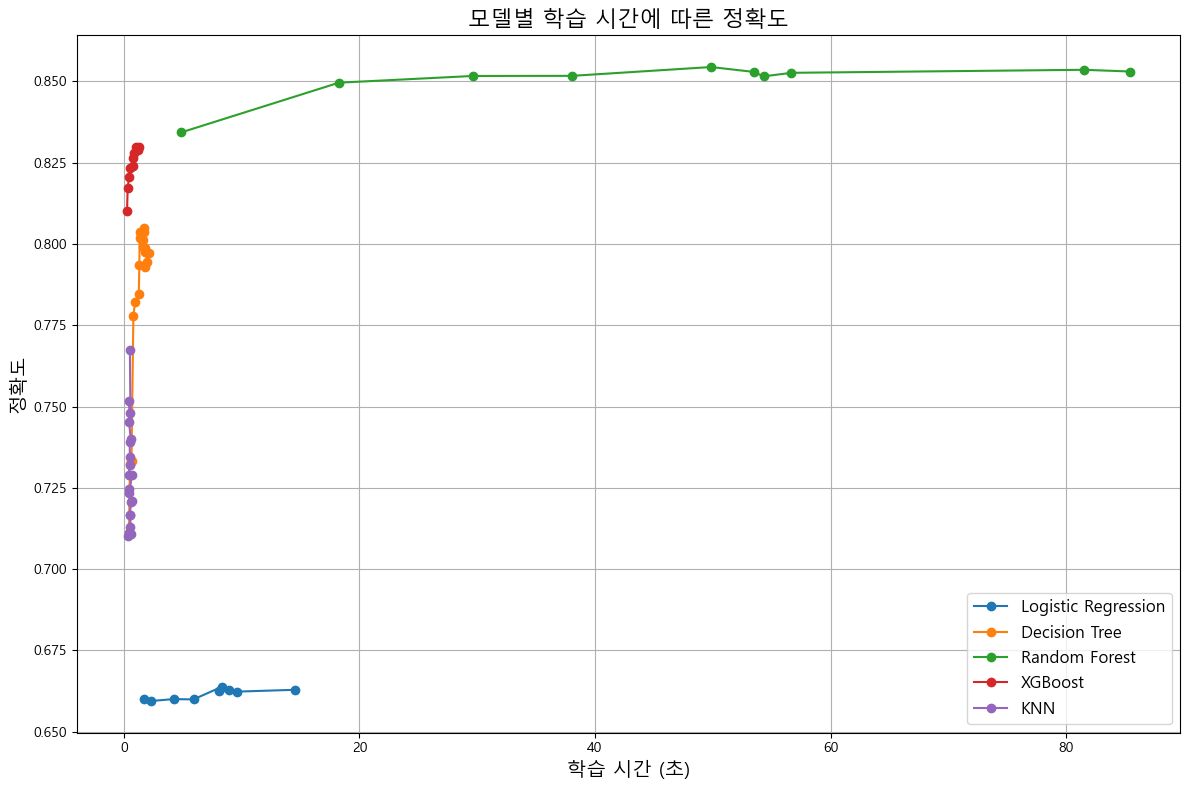

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

# 데이터 생성 및 분할 (이전과 동일)
# X, y = make_classification(n_samples=100000, n_features=20, n_classes=2, random_state=42)
# X, _, y, _ = train_test_split(X, y, train_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델과 하이퍼파라미터 설정 (이전과 동일)
models = {
    "Logistic Regression": {
        "model": LogisticRegression,
        # "params": {"C": np.logspace(-3, 3, 10)}
        "params": {"max_iter": range(100, 1000, 100)}
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier,
        "params": {"max_depth": range(1, 21)}
    },
    "Random Forest": {
        "model": RandomForestClassifier,
        "params": {"n_estimators": range(10, 210, 20)}
    },
    "XGBoost": {
        "model": XGBClassifier,
        "params": {"n_estimators": range(10, 210, 20)}
    },
    "KNN": {
        "model": KNeighborsClassifier,
        "params": {"n_neighbors": range(1, 21)}
    }
}

results = {}

# 모델 학습 및 결과 수집 (이전과 동일)
for model_name, model_info in models.items():
    times = []
    accuracies = []
    param_name = list(model_info["params"].keys())[0]
    param_values = model_info["params"][param_name]
    
    for param_value in param_values:
        model = model_info["model"](**{param_name: param_value})
        
        start_time = time.time()
        model.fit(X_train, y_train)
        end_time = time.time()
        
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        times.append(end_time - start_time)
        accuracies.append(accuracy)
    
    results[model_name] = {"times": times, "accuracies": accuracies}

# 그래프 그리기
plt.figure(figsize=(12, 8))

for model_name, model_results in results.items():
    plt.plot(model_results["times"], model_results["accuracies"], label=model_name, marker='o')

plt.xlabel("학습 시간 (초)", fontsize=14)  # x축 폰트 사이즈 조정
plt.ylabel("정확도", fontsize=14)          # y축 폰트 사이즈 조정
plt.title("모델별 학습 시간에 따른 정확도", fontsize=16)  # 제목 폰트 사이즈 조정
plt.legend(fontsize=12)                     # 범례 폰트 사이즈 조정
plt.grid(True)

plt.tight_layout()
# plt.show()
plt.savefig('savefig_default.png')